# Mammogram
---

Mammogram adalah metode paling efektif untuk skrining kanker payudara yang tersedia saat ini. Namun, nilai prediktif positif rendah dari biopsi payudara yang dihasilkan dari interpretasi mammogram mengarah ke sekitar 70% biopsi yang tidak perlu dengan hasil jinak. Untuk mengurangi tingginya jumlah biopsi payudara yang tidak perlu, beberapa sistem diagnosis berbantuan komputer (CAD) telah diusulkan dalam beberapa tahun terakhir. Sistem ini membantu dokter dalam keputusan mereka untuk melakukan biopsi payudara pada lesi yang mencurigakan yang terlihat dalam mammogram atau untuk melakukan tindak lanjut jangka pendek
ujian sebagai gantinya.

Kumpulan data ini dapat digunakan untuk memprediksi tingkat keparahan (jinak atau ganas) dari lesi massa mamografi dari atribut BI-RADS dan usia pasien. Ini berisi penilaian BI-RADS, usia pasien dan tiga atribut BI-RADS bersama-sama dengan kebenaran dasar (bidang keparahan) untuk 516 massa jinak dan 445 ganas yang telah diidentifikasi pada mamogram digital lapangan penuh yang dikumpulkan di Institute of Radiology of Universitas Erlangen-Nuremberg antara tahun 2003 dan 2006.

Setiap contoh memiliki penilaian BI-RADS terkait mulai dari 1 (pasti jinak) hingga 5 (sangat menunjukkan keganasan) yang ditugaskan dalam proses peninjauan ulang oleh dokter. Dengan asumsi bahwa semua kasus dengan penilaian BI-RADS lebih besar atau sama dengan nilai yang diberikan (bervariasi dari 1 sampai 5), ganas dan kasus-kasus lain jinak, sensitivitas dan spesifisitas terkait dapat dihitung. Ini bisa menjadi indikasi seberapa baik kinerja sistem CAD dibandingkan dengan ahli radiologi.

## Dataset

Dataset mammogram ini terdiri dari 961 data yang menjelaskan tentang kanker payudara. Pada Dataset ini terdapat 6 variabel yang terdiri dari :
1. BI_RADS_assessment
2. age
3. shape
4. margin
5. density
6. severity
    - 0 = Jinak
    - 1 = Ganas

Dataset ini dapat diunduh melalui link : https://www.mldata.io/dataset-details/mammogram/

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Dataset

Menampilkan 5 data pertama dan 5 data terakhir

In [2]:
data = pd.read_csv('mammogram_dataset.csv')
data.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1


In [3]:
data.tail()

,BI_RADS_assessment,age,shape,margin,density,severity
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1
960,4,62,3,3,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS_assessment    961 non-null int64
age                   961 non-null int64
shape                 961 non-null int64
margin                961 non-null int64
density               961 non-null int64
severity              961 non-null int64
dtypes: int64(6)
memory usage: 45.2 KB


Dataset csv ini terdiri dari 961 baris dan 6 kolom

# Pre Processing

Preprocessing data adalah tahap penting dalam pembelajaran mesin, karena data masukan yang baik dan tepat (harusnya) akan membuat estimator mampu menghasilkan keluaran yang baik pula.

Data kemudian dibagi menjadi dua jenis: data independen/prediktor (X) dan data dependen/target (y). Pembagian data ini menggunakan pandas.DataFrame.iloc seperti di bawah. Karena dataset adalah matriks M*N, kita menggunakan slicing dengan format [baris, kolom].

Atribut values akan mengembalikan numpy array. Tanpa atribut ini, iloc akan mengembalikan obyek DataFrame.

In [5]:
X = data.iloc[:,0:5].values
Y = data.iloc[:,5].values

#### Sebaran Fitur Diagnosis

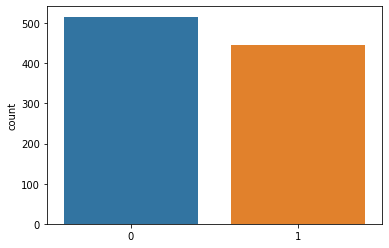

In [6]:
import seaborn as sns
sns.countplot(Y)

#### Membagi dataset ke dalam training set dan test set
Model machine learning umumnya membutuhkan dua set data untuk "belajar" dan menghasilkan estimasi: training set dan test set. Biasanya training set ini memiliki proporsi lebih besar dibandingkan test set, misal 80%.

Untuk dataset yang digunakan dalam tulisan ini:

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Untuk parameter:

- test_size : proporsi test set, dalam hal ini 0.2.
- train_size: proporsi train size. Jika tidak di set, maka akan menyesuaikan dengan test size (dalam kasus ini 0.8). Berlaku kebalikannya.
- random_state : konstan ini akan membuat hasil splitting tetap sama antar runtime atau antar mesin.

## Feature Scalling

Kita perlu menskalakan kolom-kolom yang dibutuhkan. Perbedaan skala dapat menyebabkan kendala dengan estimator. Ingat euclidean distance.

(Pada contoh ini, hanya X yang diskalakan. Untuk kasus tertentu, variabel independen dan dependen harus diskala).

**StandardScaler** menghilangkan mean (terpusat pada 0) dan menskalakan ke variansi (deviasi standar = 1), dengan asumsi data terdistribusi normal (gauss) untuk semua fitur. Formulanya

\begin{split}z = \frac{x − u} {s}\end{split}

dengan *u* adalah mean sampel dan *s* adalah deviasi standar (DS) sampel.

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

Sebenarnya ada dua parameter boolean yang bisa diatur untuk *StandardScaler()*, yaitu *with_mean* dan *with_std*. Umumnya biarkan saja ke default, yaitu True.

Terlihat pada potongan kode di atas, fitting untuk menghitung mean dan DS hanya dilakukan pada training set (lalu dilakukan transformasi *(fit_transform)*). Gunakan mean dan DS yang didapat tadi untuk test set (sehingga cukup *transform()* saja).

# Artificial Neural Network (ANN)
---

- ANN adalah salah satu main tools yang digunakan dalam Machine Learning
- Seperti yang ditunjukkan oleh bagian "Neural" dari namanya, mereka adalah sistem "Brain-Inspired" yang dimaksudkan untuk mereplikasi cara  manusia belajar.
- Neural Network terdiri dari input dan output layer, serta (dalam kebanyakan kasus) hidden layer yang terdiri dari unit-unit yang mengubah input menjadi sesuatu yang dapat digunakan oleh output layer.
- ANN adalah tools yang sangat baik untuk menemukan pola yang terlalu rumit atau banyak bagi seorang programmer untuk mengekstraksi dan mengajarkan mesin untuk mengenali sesuatu.
- Neural Network juga disebut "perceptrons".
- Neural Network telah menjadi bagian utama dari kecerdasan buatan dalam beberapa dekade terakhir. Ini disebabkan oleh kedatangan teknik yang disebut "backpropagation," yang memungkinkan network untuk menyesuaikan hidden layer neuron mereka dalam situasi di mana hasilnya tidak sesuai dengan apa yang diharapkan creator.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.activations import relu, sigmoid

Using TensorFlow backend.


### Layers

Layer menerima input weight dan mengubah nilai tersebut yang umumnya fungsi non-linear dan meneruskannya sebagai output ke layer selanjutnya. Layer terdiri dari input layer, hidden layer, dan output layer.

### Epochs
Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).

Seiring bertambahnya jumlah epoch, semakin banyak pula weight (bobot) yang berubah dalam Neural Network dan kurvanya melengkung dari kurva yang kurang sesuai hingga selaras dengan kurva yang overfitting.

### Batch Size
Batch Size adalah jumlah sampel data yang disebarkan ke Neural Network. Contoh: jika kita mempunyai 100 dataset dan batch size kita adalah 5 maka algoritma ini akan menggunakan 5 sempel data pertama dari 100 data yang kita miliki (ke1, ke2, ke3, ke4, dan ke5) lalu disebarkankan atau ditraining oleh Neural Network sampai selesai kemudian mengambil kembali 5 sampel data kedua dari 100 data (ke6, ke7, ke8, ke9, dan ke10), dan begitu seterusnya sampai 5 sampel data ke 20 (100⁄5=20).

## Activation Function
**Activation function** befungsi untuk menentukan apakah neuron tersebut harus “aktif” atau tidak berdasarkan dari weighted sum dari input. Secara umum terdapat 2 jenis activation function, Linear dan Non-Linear Activation function.

**Relu** melakukan “treshold” dari 0 hingga infinity. ReLU juga dapat menutupi kelemahan yang dimiliki oleh Sigmoid.
Karna ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x
Ada beberapa pro dan kontra ketika kita menggunakan ReLU:

Kelebihan :
- ReLU sangat mempercepat proses konvergensi yang dilakukan dengan stochastic gradient descent jika dibandingkan dengan sigmoid / tanh.
- Jika kita bandingan dengan sigmoid/tanh yang memiliki operasi-operasi yang “expensive” (exponentials, etc.), ReLU bisa kita implementasikan hanya dengan membuat pembatas(threshold) pada bilangan nol.

Kekurangan :
- Sayangnya, unit ReLU bisa menjadi rapuh pada saat proses training dan bisa membuat unit tersebut “mati”. Sebagai contohnya, kita mungkin bisa menemukan bahwa 40% dari network kita “mati” (neuron yang tidak akan pernah aktif selama proses training) apabila learning rate yang kita inisialisasi terlalu tinggi. Namun apabila kita menginisialisasi learning rate kita secara tepat maka hal seperti ini jarang menjadi masalah.


**Sigmoid** function mempunyai rentang antara 0 hingga 1 sedangkan rentang dari Tanh adalah -1 hingga 1.
Sigmoid memiliki bentuk formula sebagai berikut :
\begin{split}S(x) = \frac{1} { 1+e-x }\end{split}
Sigmoid akan menerima angka tunggal dan mengubah nilai x menjadi sebuah nilai yang memiliki range mulai dari 0 sampai 1. Belakangan ini Sigmoid tidak disukai dan jarang digunakan, sigmoid memiliki kekurangan berupa:
- Sigmoid mematikan gradient, property yang paling tidak diinginkan dari Sigmoid adalah ketika activation dari neuron mengeluarkan nilai yang berada pada ekor 0 atau 1, dimana gradient di wilayah ini hampir nol. Karena itu, jika gradient memiliki nilai yang sangat kecil, Sigmoid akan “mematikan” gradient dan kita sangat tidak menginginkan hal ini terjadi saat melakukan backpropagation.
- Output dari Sigmoid tidak zero-centered. Hal ini berimplikasi pada kedinamisan saat melakukan gradient descent, karna apabila data yang datang ke neuron selalu positif maka gradient pada weights selama backpropagation akan menjadi semua positif atau semua negatif. Hal seperti ini dapat mengganggu proses training, tetapi hal ini tidak separah seperti hal yang ada pada point pertama(mematikan gradient).

## Loss Function
**Loss Function** digunakan untuk mengukur seberapa bagus performa dari neural network kita dalam melakukan prediksi terhadap target.

- *Loss = (Target - Prediction)*<sup>2</sup>

Ada berbagai macam loss function, namun yang paling sering digunakan adalah Squared Error (L2 Loss) untuk regresi. Sedangkan untuk klasifikasi yang biasa digunakan adalah **Cross-Entropy**.

**Cross-Entropy** mengukur kinerja model klasifikasi yang outputnya merupakan nilai probabilitas antara 0 dan 1. Kehilangan lintas-entropi meningkat karena probabilitas yang diprediksi menyimpang dari label aktual. Jadi memprediksi probabilitas 0,012 ketika label observasi aktual adalah 1 akan buruk dan menghasilkan nilai kerugian yang tinggi. Model yang sempurna akan kehilangan log 0.

**Optimizers** digunakan untuk memperbarui bobot dan bias yaitu parameter internal model untuk mengurangi kesalahan.
Teknik yang paling penting dan dasar bagaimana kita melatih dan mengoptimalkan model kita adalah menggunakan Gradient Descent.digunakan untuk memperbarui bobot dan bias yaitu parameter internal model untuk mengurangi kesalahan.
Teknik yang paling penting dan dasar bagaimana kita melatih dan mengoptimalkan model kita adalah menggunakan Gradient Descent.

**Adam** merupakan cara lain untuk menggunakan gradien masa sebelumnya untuk menghitung gradien saat ini. Adam juga memanfaatkan konsep momentum dengan menambahkan pecahan dari gradien sebelumnya ke yang sekarang. Pengoptimal ini telah menjadi sangat luas, dan secara praktis diterima untuk digunakan dalam test neural network.

In [20]:
model = Sequential()

# Hidden layer dan Input Layer
model.add(Dense(100, activation = 'relu', input_dim = 5))
model.add(Dense(50, activation = 'relu'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = Adam(lr = 0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])

acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200)
acc_testing  = model.evaluate(X_test, y_test)

Train on 768 samples, validate on 193 samples
Epoch 1/200
768/768 [==============================] - 1s 2ms/step - loss: 0.7505 - acc: 0.4583 - val_loss: 0.7418 - val_acc: 0.4767
Epoch 2/200
768/768 [==============================] - 0s 297us/step - loss: 0.7462 - acc: 0.4583 - val_loss: 0.7374 - val_acc: 0.4767
Epoch 3/200
768/768 [==============================] - 0s 282us/step - loss: 0.7419 - acc: 0.4583 - val_loss: 0.7331 - val_acc: 0.4767
Epoch 4/200
768/768 [==============================] - 0s 322us/step - loss: 0.7378 - acc: 0.4583 - val_loss: 0.7288 - val_acc: 0.4819
Epoch 5/200
768/768 [==============================] - 0s 315us/step - loss: 0.7336 - acc: 0.4583 - val_loss: 0.7246 - val_acc: 0.4819
Epoch 6/200
768/768 [==============================] - 0s 306us/step - loss: 0.7296 - acc: 0.4583 - val_loss: 0.7204 - val_acc: 0.4819
Epoch 7/200
768/768 [==============================] - 0s 287us/step - loss: 0.7255 - acc: 0.4583 - val_loss: 0.7164 - val_acc: 0.4819
Epoch 8/200

Epoch 61/200
768/768 [==============================] - 0s 466us/step - loss: 0.5602 - acc: 0.8073 - val_loss: 0.5472 - val_acc: 0.8290
Epoch 62/200
768/768 [==============================] - 0s 447us/step - loss: 0.5579 - acc: 0.8086 - val_loss: 0.5449 - val_acc: 0.8342
Epoch 63/200
768/768 [==============================] - 0s 421us/step - loss: 0.5557 - acc: 0.8060 - val_loss: 0.5426 - val_acc: 0.8342
Epoch 64/200
768/768 [==============================] - 0s 422us/step - loss: 0.5535 - acc: 0.8073 - val_loss: 0.5402 - val_acc: 0.8342
Epoch 65/200
768/768 [==============================] - 0s 409us/step - loss: 0.5513 - acc: 0.8073 - val_loss: 0.5379 - val_acc: 0.8342
Epoch 66/200
768/768 [==============================] - 0s 351us/step - loss: 0.5491 - acc: 0.8073 - val_loss: 0.5355 - val_acc: 0.8342
Epoch 67/200
768/768 [==============================] - 0s 327us/step - loss: 0.5470 - acc: 0.8073 - val_loss: 0.5333 - val_acc: 0.8394
Epoch 68/200
768/768 [==========================

768/768 [==============================] - 0s 273us/step - loss: 0.4628 - acc: 0.8203 - val_loss: 0.4419 - val_acc: 0.8290
Epoch 122/200
768/768 [==============================] - 0s 275us/step - loss: 0.4618 - acc: 0.8203 - val_loss: 0.4407 - val_acc: 0.8290
Epoch 123/200
768/768 [==============================] - 0s 286us/step - loss: 0.4608 - acc: 0.8203 - val_loss: 0.4396 - val_acc: 0.8290
Epoch 124/200
768/768 [==============================] - 0s 279us/step - loss: 0.4598 - acc: 0.8203 - val_loss: 0.4386 - val_acc: 0.8290
Epoch 125/200
768/768 [==============================] - 0s 281us/step - loss: 0.4589 - acc: 0.8203 - val_loss: 0.4375 - val_acc: 0.8290
Epoch 126/200
768/768 [==============================] - 0s 271us/step - loss: 0.4580 - acc: 0.8203 - val_loss: 0.4364 - val_acc: 0.8290
Epoch 127/200
768/768 [==============================] - 0s 287us/step - loss: 0.4570 - acc: 0.8203 - val_loss: 0.4354 - val_acc: 0.8342
Epoch 128/200
768/768 [==============================] 

Epoch 181/200
768/768 [==============================] - 0s 280us/step - loss: 0.4251 - acc: 0.8190 - val_loss: 0.3987 - val_acc: 0.8342
Epoch 182/200
768/768 [==============================] - 0s 275us/step - loss: 0.4247 - acc: 0.8190 - val_loss: 0.3983 - val_acc: 0.8342
Epoch 183/200
768/768 [==============================] - 0s 284us/step - loss: 0.4244 - acc: 0.8190 - val_loss: 0.3978 - val_acc: 0.8342
Epoch 184/200
768/768 [==============================] - 0s 271us/step - loss: 0.4240 - acc: 0.8190 - val_loss: 0.3975 - val_acc: 0.8342
Epoch 185/200
768/768 [==============================] - 0s 275us/step - loss: 0.4237 - acc: 0.8190 - val_loss: 0.3971 - val_acc: 0.8342
Epoch 186/200
768/768 [==============================] - 0s 277us/step - loss: 0.4234 - acc: 0.8190 - val_loss: 0.3967 - val_acc: 0.8342
Epoch 187/200
768/768 [==============================] - 0s 280us/step - loss: 0.4231 - acc: 0.8190 - val_loss: 0.3963 - val_acc: 0.8394
Epoch 188/200
768/768 [==================

### Hasil Akurasi Prediksi
---

In [18]:
print("Akurasi data Testing = %.2f%%" % (acc_testing[1]*100))

Akurasi data Testing = 83.42%


# Plotting Model Akurasi dan Loss
---

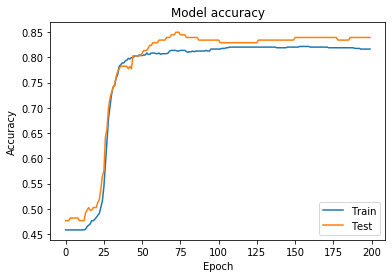

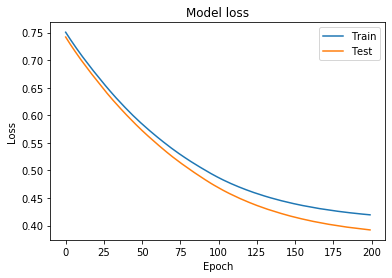

In [21]:
# Plot training & validation accuracy values
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluasi Model
------

**Confusion Matrix** adalah teknik untuk meringkas perfomance dari algoritma klasifikasinya.

Klasifikasi akurasi bisa saja *misleading* jika memiliki jumlah pengamatan yang tidak sama di setiap kelas atau jika  memiliki lebih dari dua kelas dalam dataset Anda.

Menghitung **Confusion Matrix** dapat memberi ide yang lebih baik tentang apakah model klasifikasinya benar dan jenis kesalahan apa yang dibuatnya.

- True Positive (TP), yaitu jumlah dari kelas 1 yang benar dan diklasifikasikan sebagai kelas 1.
- True Negative (TN), yaitu jumlah dari kelas 0 yang benar diklasifikasikan sebagai kelas 0.
- False Positive (FP), yaitu jumlah dari kelas 0 yang salah diklasifikasikan sebagai kelas 1.
- False Negative (FN), yaitu jumlah dari kelas 1 yang salah diklasifikasikan sebagai kelas 0.


1. Akurasi adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

\begin{split}Akurasi = \frac{TP+TN} {TP+FP+FN+TN}\end{split}

2. Presisi adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
\begin{split}Presisi = \frac{TP} {TP+FP}\end{split}

3. Recall (Sensitifitas) adalah rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
\begin{split}Recall = \frac{TP} {TP+FN}\end{split}

4. Specificity adalah kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif.
\begin{split}Specificity = \frac{TN} {TN+FP}\end{split}
5. F1 Score adalah perbandingan rata-rata presisi dan recall yang dibobotkan.
\begin{split}F1 Score = \frac {2 \times Recall \times Presisi} {Recall + Presisi}\end{split}

In [22]:
# Prediksi
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

y_pred_train = model.predict(X_train)
y_pred_train= (y_pred_train > 0.5)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

In [23]:
cm_test

array([[86, 15],
       [16, 76]], dtype=int64)

In [24]:
tp = cm_test[0][0]
fn = cm_test[0][1]
fp = cm_test[1][0]
tn = cm_test[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy test {0}".format(accuracy))
print("Specificity test {0}".format(specificity))
print("Sensitivity test {0}".format(sensitivity))
print("Precision test {0}".format(precision))
print("F1 Score test {0}".format(f1_score))

Accuracy test 0.8393782383419689
Specificity test 0.8260869565217391
Sensitivity test 0.8514851485148515
Precision test 0.8431372549019608
F1 Score test 0.8472906403940887


In [25]:
cm_train

array([[335,  80],
       [ 61, 292]], dtype=int64)

In [26]:
tp = cm_train[0][0]
fn = cm_train[0][1]
fp = cm_train[1][0]
tn = cm_train[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.81640625
Specificity training 0.8271954674220963
Sensitivity training 0.8072289156626506
Precision training 0.8459595959595959
F1 Score training 0.8261405672009865
